In [1]:
#Libraries
import matplotlib.pylab as plt
from matplotlib import cm
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data

In [2]:
#Inputs
A=1  #Area
E=1  #ELasticity
L=1  #Large
q0=1 #Distributed force

# Problema 1
Se tiene la siguiente barra 1D

![title](../img/problem1.png)

## 1.1 Formulacion Fuerte (S)
* Cinematica

Sea $u: [0, L] \to {\rm I\!R}$ el campo de desplazamiento de la barra. Del empotramiento, tenemos que $u(0) = 0$ y del extremo donde se aplica la fuerza $F$, se tiene que $AE\cdot u_{,x}(L) = F$. Sabemos que la deformacion unitaria asociada a $u(x)$ es:
$$\varepsilon (x) = \frac{\partial u(x)}{\partial x} = \frac{\partial u}{\partial x} = u_{,x}(x)$$

* Relacion constitutiva

$$\sigma (x) = E\varepsilon (x)$$

* Equilibrio (diferencial)

$$\sum F_x = 0 \to -\sigma(x)A + q(x)\bigtriangleup x + A[\sigma(x) + \frac{\partial \sigma(x)}{\partial x}\bigtriangleup x] = 0$$
$$\frac{\partial \sigma(x)}{\partial x} =- \frac{q(x)}{A} $$

De la cinematica, relacion constitutiva y equilibrio se obtiene un problema de valor de frontera:

## 1.2 Solucion Analitica
Resolviendo la ecuacion diferencial
$$u_{,xx} = -\frac{q(x)}{AE} = -\frac{q_0\cdot x^2}{AE\cdot L^2} \to u(x) = \frac{q_0\cdot x^4}{12AE\cdot L^2} + c_2\cdot x + c_1$$

Condiciones de borde (BC)
1. $u(0) = 0 \to 0 = c_1$
2. $u_{,x}(L) = \frac{F}{AE} = \frac{4q_0L^3}{12AE\cdot L^2} + c_2 \to c_2 = \frac{F}{AE} - \frac{q_0L}{3AE} = \frac{q_0L}{AE} - \frac{q_0L}{3AE}  = \frac{2q_0L}{3AE}$

Finalmente
$$u(x) = \frac{q_0\cdot x^4}{12AE\cdot L^2} + \frac{2q_0L}{3AE}\cdot x $$

## 1.3 Energia Pontencial
$$\prod [u] := \int_0^L \frac{1}{2}AE(u_{,x})^2dx - \int_0^L u(x)\cdot q(x) dx - u(L)F$$

Resolvemos las integrales por separado:
1. $\int_0^L \frac{1}{2}AE(u_{,x})^2dx = \frac{2L^3\cdot q_0^2}{7AE}$
2. $\int_0^L u(x)\cdot q(x) dx  = -\frac{5L^3\cdot q_0^2}{28AE}$
3. $u(L)F = \frac{9q_0^2\cdot L^3}{12AE}$

Finalmente
$$\prod [u] := \frac{2L^3\cdot q_0^2}{7AE} + \frac{5L^3\cdot q_0^2}{28AE} - \frac{9q_0^2\cdot L^3}{12AE} = -\frac{2}{7}\cdot \frac{q_0^2\cdot L^3}{AE}$$

# 1.4 Energia Potencial Sistema Discreto

El desplazamiento $u(x)$ se puede discretizar de la siguiente forma:
$$u(x)= \left\{ 
\begin{matrix}
      2\frac{u_1}{L}x & 0\leq x\leq \frac{L}{2}\\
      2\frac{u_2-u_1}{L}(x-L)+u_2 & \frac{L}{2}<x\leq L                          
\end{matrix}
   \right.
$$

Con $u_1 = u(L/2) $ y $u_2=u(L)$. Luego la derivada debil de la funcion por tramos es:

$$u_{,x}(x)= \left\{ 
\begin{matrix}
              2\frac{u_1}{L} & 0\leq x\leq \frac{L}{2}\\
              2\frac{u_2-u_1}{L} & \frac{L}{2}<x\leq L
\end{matrix}
   \right.
$$

La energia potencial se puede expresar como:

$$\prod [u_1,u_2] = \prod_1 + \prod_2 $$

* $\prod_1=\int_0^{L/2} \frac{1}{2}AE(2\frac{u_1}{L})^2dx +\int_0^{L/2}q_0\frac{x^2}{L^2}\cdot  2\frac{u_1}{L}x dx  = \frac{AEu_1^2}{L} + \frac{q_0Lu_1}{32}$
* $\prod_2=\int_{L/2}^L \frac{1}{2}AE(2\frac{u_2-u_1}{L} )^2dx -\int_{L/2}^{L} -q_0\frac{x^2}{L^2}[ 2\frac{u_2-u_1}{L}(x-L)+u_2] dx - u_2F$ \\\\
$\to \prod_2= \frac{(u_1 - u_2)^2}{L}AE + \frac{q_0L}{96}(11u_1 + 17u_2) - u_2q_0L$

$$\prod [u_1,u_2] = \frac{AEu_1^2}{L} + \frac{q_0Lu_1}{32} +  \frac{(u_1 - u_2)^2}{L}AE + \frac{q_0L}{96}(11u_1 + 17u_2) - u_2q_0L $$

Finalmente:
$$\prod [u_1,u_2] = \frac{AE}{L}u_1^2  + \frac{AE}{L}(u_1 - u_2)^2 + \frac{7qL}{48}\cdot u_1 - \frac{79qL}{96}\cdot u_2$$

### 1.4.1 Minimizacion

$$\frac{\partial \prod [u_1,u_2]}{\partial u_1} = 0 \to \frac{2AE}{L}u_1 + \frac{2AE}{L}(u_1 - u_2) + \frac{7qL}{48} = 0$$
$$\frac{\partial \prod [u_1,u_2]}{\partial u_2} = 0 \to - \frac{2AE}{L}(u_1 - u_2) - \frac{79qL}{96} = 0$$

Resolviendo el sistema de ecuaciones, los valores de $u_1$ y $u_2$ que minimizan la funcion son:
$$u_1 = \frac{65qL^2}{192AE}$$
$$u_2 = \frac{3qL^2}{4AE}$$
Reemplazando estos valores en $\prod [u_1,u_2]$:
$$\prod_{min} = -\frac{5233}{18432}=  -0.2839$$
La energia minima para el caso discretizado es mayor que para el caso exacto.

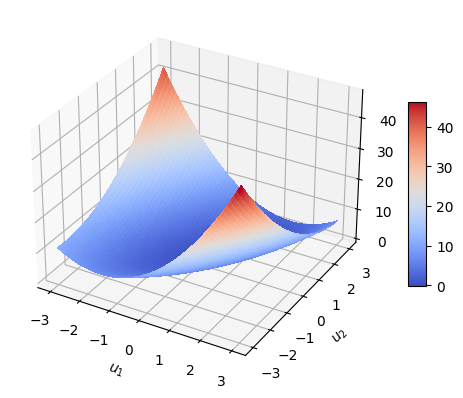

In [3]:
#====================================
# Plot 3D
#====================================
n=60
X =np.linspace(-3,3,n)
Y=np.linspace(-3,3,n)
X, Y = np.meshgrid(X, Y)

Z = (A*E*X**2/L +(X - Y)**2*A*E/L + 7*q0*L*X/48 - 79*q0*L*Y/96)

u1min = 65.*q0*L**2/(192*A*E)
u2min= 3.*q0*L**2/(4*A*E)

fig = plt.figure(figsize=plt.figaspect(0.3))
ax = fig.add_subplot(1, 2, 1, projection='3d')            
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_zlim(np.min(Z), np.max(Z))
fig.colorbar(surf, shrink=0.5, aspect=10)

data_x = [u1min]
data_y = [u2min]
data_z = [np.min(Z)]
ax.plot(data_x, data_y,data_z, 'or')
plt.ylabel('$u_2$')
plt.xlabel('$u_1$')

plt.show()

<Figure size 640x480 with 0 Axes>

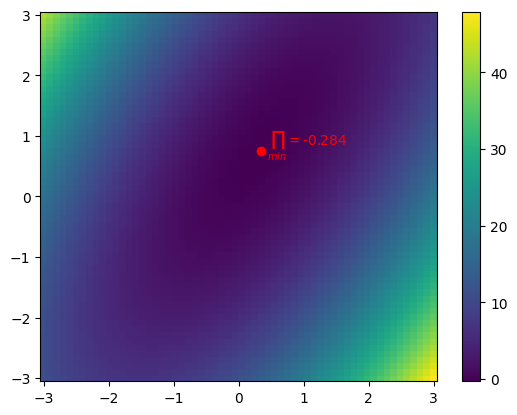

In [4]:
#====================================
# Contour plot
#====================================

plt.figure() 
fig=plt.figure()
ax1 = fig.add_subplot(111)
data_x = [u1min]
data_y = [u2min]
ax1.plot(data_x, data_y, 'or')
plt.annotate('$\prod_{min}= $'
+str(np.round(np.min(Z),3))
,([u1min+0.1,u2min+0.1]),size=10.
,color='r')
plt.pcolor(X,Y,Z, vmin=np.min(Z)
, vmax=np.max(Z)) 
plt.colorbar() 
plt.show()